In [56]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [31]:
def load_df(csv_path='C:/Users/rohan/Desktop/uic/Kaggle/kernals/GA Customer revenue/train.csv/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df


In [34]:
%%time
train_df = load_df()
test_df = load_df("C:/Users/rohan/Desktop/uic/Kaggle/kernals/GA Customer revenue/test.csv/test.csv")



Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)
Wall time: 44min 12s


In [47]:
#train_df.columns
#train_df["totals.transactionRevenue"].head()
train_df["totals.transactionRevenue"]= train_df["totals.transactionRevenue"].astype('float')
grup_train_df = train_df.groupby('fullVisitorId')["totals.transactionRevenue"].sum().reset_index()


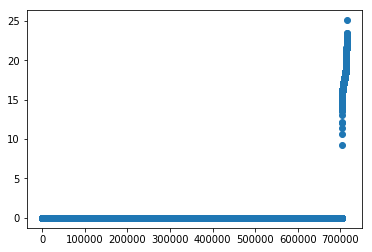

In [67]:
grup_train_df.head()
#plt.scatterplot(range(grup_train_df.shape[0]),log_rev)
log_rev= np.sort(np.log1p(grup_train_df["totals.transactionRevenue"].values))
log_rev
plt.scatter(range(grup_train_df.shape[0]),log_rev)
plt.show()